In [507]:
import numpy as np
import pandas as pd

In [508]:
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'size': [10, 15, 18, 25, 30, 32, 35, 40, 22, 35, 23],
    # 'color': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Green', 'Green', 'Red'],
    'color': [0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0],
    'Target':   [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]
})
df = data

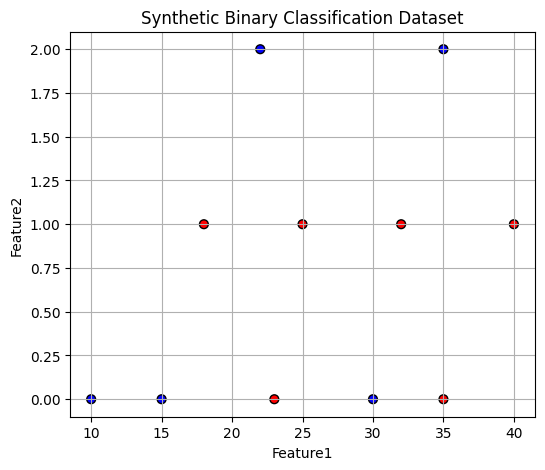

In [509]:
plt.figure(figsize=(6, 5))
plt.scatter(df['size'], df['color'], c=df['Target'], cmap='bwr', edgecolor='k', s=40)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Synthetic Binary Classification Dataset")
plt.grid(True)
plt.show()

In [510]:
df.columns

Index(['size', 'color', 'Target'], dtype='object')

In [511]:
len(df)

11

In [512]:
df['size'][0].dtype == 'int64'

True

In [513]:
type(sorted(df['size']))

list

In [514]:
len(df[(df['color'] == 'Blue') & (df['Target'] == 1)])


0

In [515]:
import numpy as np

def cross_entropy_catg(df, column, value, included=True):
    """
    this function calculate the cross entropy when you split on `value` of column

    :param df: dataframe
    :param column: column on which you are splitting
    :param value: value for split happen
    """
    if included:
        post_cnt = len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[(df[column] == value) & (df['Target'] == 0)])
    else:
        post_cnt = len(df[df['Target'] == 1]) - len(df[(df[column] == value) & (df['Target'] == 1)])
        negt_cnt = len(df[df['Target'] == 0]) - len(df[(df[column] == value) & (df['Target'] == 0)])
    
    total = post_cnt + negt_cnt

    if total == 0:
        return 0

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy

In [516]:
import numpy as np

def cross_entropy_num(df, column, value, included=True):
    if included:
        subset = df[df[column] < value]
    else:
        subset = df[df[column] >= value]

    post_cnt = len(subset[subset['Target'] == 1])
    negt_cnt = len(subset[subset['Target'] == 0])
    total = post_cnt + negt_cnt

    if total == 0:
        return 0  # no samples to evaluate

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return entropy


In [517]:
cross_entropy_catg(df, 'color', 'Red', True)

0

In [518]:
cross_entropy_num(df, 'size', 20, True)

np.float64(0.9182958340544896)

In [519]:
def cross_entropy_parent(df):

    post_cnt = len(df[df['Target'] == 1])
    negt_cnt = len(df[df['Target'] == 0])
    total = post_cnt + negt_cnt

    if total == 0:
        return 0  # no samples to evaluate

    entropy = 0
    if post_cnt > 0:
        entropy -= (post_cnt / total) * np.log2(post_cnt / total)
    if negt_cnt > 0:
        entropy -= (negt_cnt / total) * np.log2(negt_cnt / total)

    return  entropy


In [520]:
def calculate_information_gain(df, column, criteria):
    parent_entropy = cross_entropy_parent(df)
    if type(df[column].iloc[0]) == str:
        include_node = cross_entropy_catg(df, column, criteria, True)
        except_node = cross_entropy_catg(df, column, criteria, False)
        return parent_entropy - (include_node + except_node)
    else:
        lesser_side = cross_entropy_num(df, column, criteria, True)
        greater_side = cross_entropy_num(df, column, criteria, False)
        return parent_entropy - (lesser_side + greater_side)
    

In [521]:
def best_threshold_to_split(df, column):
    if type(df[column].iloc[0]) == str:
        split_node = list(df[column].unique())
    else:
        sorted_attr = sorted(df[column])
        split_node = []
        for i in range(len(df)-1):
            split_node.append((sorted_attr[i] + sorted_attr[i+1])/2)
    # print(split_node)

    # if there is only one unique value in the df[column] return that this is not the best way to split
    if len(df[column].unique()) == 1:
        return -5500, df[column].iloc[0], column

    information_gain = []

    for criteria in split_node:
        "make a subset of the dataframe for particular criteria of the column"
        curr_ig = calculate_information_gain(df, column, criteria)
        information_gain.append(curr_ig)

    splitting_criteria_index = np.argmax(np.array(information_gain))

    print(information_gain[splitting_criteria_index])
    return information_gain[splitting_criteria_index], split_node[splitting_criteria_index], column


In [522]:
columns = df.columns
columns

Index(['size', 'color', 'Target'], dtype='object')

In [523]:
for column in columns[:-1]:
    print(best_threshold_to_split(df, column))

0.07573437742246691
(np.float64(0.07573437742246691), 16.5, 'size')
0.07573437742246691
(np.float64(0.07573437742246691), 1.5, 'color')


In [524]:
zero_entropy_subset = []
splits_done = []

def solve(df):
    best_split = []
    # print(f"reached here.....0")
    for column in df.columns[:-1]:
        # print(f"Calling for column: {column}")
        best_split.append(best_threshold_to_split(df, column))
    
    # print(f"reached here.....1")

    best_split = sorted(best_split, key= lambda x : x[0], reverse=True)
    # print(f"reached here.....2")

    ig_value_at_split, value_at_split, column_at_split = best_split[0][0], best_split[0][1], best_split[0][2]

    if ig_value_at_split ==0 :
        return


    splits_done.append((value_at_split, column_at_split))
    
    print(value_at_split, column_at_split)
    print(df)

    if isinstance(value_at_split, str):
        df_left = df[df[column_at_split]==value_at_split]
        df_right = df[df[column_at_split]!=value_at_split]
    else:
        df_left = df[df[column_at_split]<value_at_split]
        df_right = df[df[column_at_split]>=value_at_split]

    if cross_entropy_parent(df_left) < 0.1:
        zero_entropy_subset.append(df_left)
    else:
        print(f"Calling left Part")
        solve(df_left)
    if cross_entropy_parent(df_right) < 0.1:
        zero_entropy_subset.append(df_right)
    else:
        # print(f"Calling right Part")
        # print("-----")
        # print(df_right)
        # print("-----")
        solve(df_right)

solve(df)

0.07573437742246691
0.07573437742246691
16.5 size
    size  color  Target
0     10      0       0
1     15      0       0
2     18      1       1
3     25      1       1
4     30      0       0
5     32      1       1
6     35      0       1
7     40      1       1
8     22      2       0
9     35      2       0
10    23      0       1
-0.036138168870475496
0.3266230554721621
1.5 color
    size  color  Target
2     18      1       1
3     25      1       1
4     30      0       0
5     32      1       1
6     35      0       1
7     40      1       1
8     22      2       0
9     35      2       0
10    23      0       1
Calling left Part
-0.058349643066026635
0.0


In [525]:
len(zero_entropy_subset)

2

In [526]:
for df in zero_entropy_subset:
    print("----------------")
    print(df)
    print("----------------")

----------------
   size  color  Target
0    10      0       0
1    15      0       0
----------------
----------------
   size  color  Target
8    22      2       0
9    35      2       0
----------------


In [527]:
df

,size,color,Target
8,22,2,0
9,35,2,0


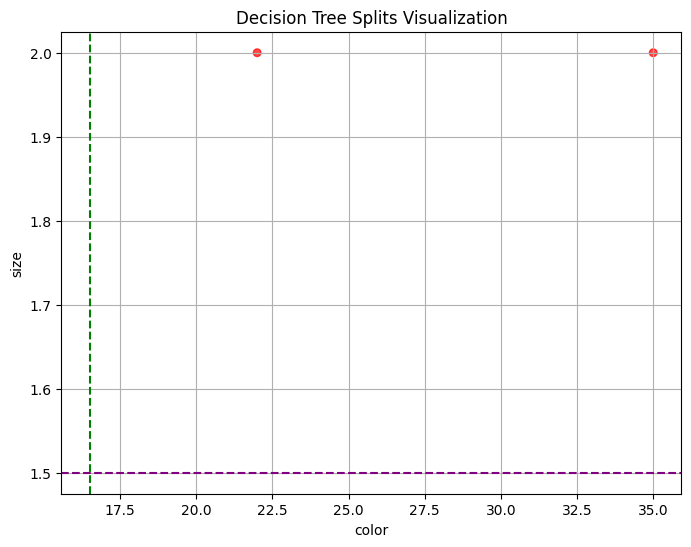

In [528]:
colors = ['red' if t == 0 else 'blue' for t in df['Target']]
plt.figure(figsize=(8, 6))
plt.scatter(df['size'], df['color'], c=colors, s=30, alpha=0.7)

# Draw each split
for val, col in splits_done:
    if col == 'size':
        plt.axvline(x=val, color='green', linestyle='--')
    elif col == 'color':
        plt.axhline(y=val, color='purple', linestyle='--')

plt.title("Decision Tree Splits Visualization")
plt.xlabel("color")
plt.ylabel("size")
plt.grid(True)
plt.show()
